In [ ]:
# script que implementa FinaleToolkit para análisis fragmentómico
# https://github.com/epifluidlab/FinaleToolkit
# autora: suarezhs@uoc.edu

El pipeline se ha instalado previamente en conda. El environment está disponible en el repositorio (environment.yaml).

In [ ]:
#!conda install -c bioconda -c conda-forge finaletoolkit

# Importar datos

In [15]:
# settings generales

# working directory to root folder
import os
os.chdir('/mnt/scratch_dir/suarezhs/tfm/bcltofragmentomics/')

# output directories
# datos procesddos (QC) - en root (donde data folder)
data_qcdir = '../data/alignments_qc'

# resultados
results_frag = 'results/01_fragment_lengths'
results_endmot = 'results/02_endmotifs'

# crearlos
os.makedirs(data_qcdir, exist_ok=True)
os.makedirs(results_frag, exist_ok=True)
os.makedirs(results_endmot, exist_ok=True)

In [ ]:
# en terminal
#finaletoolkit frag-length-bins \
#   ../data/alignments/POOL-473N/L-25000010_S5.bam \
#   -min 50 \
#   -max 300 \
#   --bin-size 1 \
#   -q 30 \
#   > L-25000010_S5_fraglengths.tsv

In [ ]:
# que hay en el paquete porque no encuento documentacion que no sea
# para el command line

#import finaletoolkit as ftk
#import pkgutil
#import importlib

#for m in pkgutil.iter_modules(ftk.__path__):
#    print(m.name)

#submodules = ["cli", "frag", "genome", "utils", "version"]

#for sm in submodules:
#    print("\n### Submodule:", sm)
#    mod = importlib.import_module(f"finaletoolkit.{sm}")
#    print(dir(mod))

In [ ]:
#help(frag.frag_length_bins)

# QC

* Crea carpeta en data/alignments_qc
* Runneado aquí pero mover como script
* **QUITAR CONTEO INCLUIDO/EXCLUIDO PARA BARPLOT**

In [ ]:
# # head of bam file
# import os
# import glob
# import pysam # leer bam en python
# import matplotlib.pyplot as plt
# import numpy as np
# import time

# # este codigo aplica QC y genera barplot de lecturas incluidas/excluidas

# start = time.time()

# # path archivos bam
# data_bamsdir = glob.glob("../data/alignments/POOL-*/*.markdup.bam")

# # bams a analizar (no vacios) - esto es temporar ya que deberian de haberse ignorado en el alineamiento
# bams_lecturas = []

# for filepath in data_bamsdir:
#     # guardo nombre sample (base del path) sin markdup.bam
#     samplename = os.path.basename(filepath).replace('.markdup.bam', '')
    
#     # si no es muestra a excluir (vacia)
#     if not re.match(r"^ID([1-9]|1[0-9]|2[0-4])_", samplename):
#         # anyado a bam con lecturas
#         bams_lecturas.append(filepath)

# total_files = len(bams_lecturas)

# #sample_list = []
# included_counts = []
# excluded_counts = []

# for i, filepath in enumerate(bams_lecturas, start=1):

#     # guardo nombre sample (base del path) sin markdup.bam
#     samplename = os.path.basename(filepath).replace('.markdup.bam', '')

#     # anyado a lista
#     #sample_list.append(sample)

#     # conteo de pares de lecturas includias/exclusiodas
#     included = 0
#     excluded = 0

#     # crear output qc file a escribir
#     out_bam_path = os.path.join(data_qcdir, samplename + ".filtered.bam")

#     # y escribir cada lectura (los pares que han pasado el filtro)
#     print(f'Leyendo y filtrando archivo .markdup.bam #{i}/{total_files} y escribiendo en: {out_bam_path}\n')
        
#     # leer bam u escribir filtered.bam correspondiente
#     with pysam.AlignmentFile(filepath, "rb") as bam, pysam.AlignmentFile(out_bam_path, "wb", header=bam.header) as out_bam:

#         # para cada lectura hasta el final (until_eof=T)
#         for read in bam.fetch(until_eof=True):

#             # excluir si se cumple cualquiera de estas reglas
#             if (
#                 read.is_unmapped or # lectura no mapeada
#                 read.mate_is_unmapped or # par de lecturas no alineada ok
#                 read.is_duplicate or # lectura esta duplicada
#                 not read.is_proper_pair or # lectura no esta emparejada
#                 read.mapping_quality <= 30 # la calidad del alineamiento es baja
#             ):
#                 # si es read1 - anyadir a lista excluir (solo contar el par como 1)
#                 if read.is_read1:
#                     excluded += 1
#                 # si no seguir
#                 continue
            
#             out_bam.write(read)

#             # si es read1 y ha pasado el filtro, anyadimos la lectura (representante
#             # del par) a lista incluidas
#             if read.is_read1:
#                 included += 1

#     # anyadimos las lecturas a la lista respectiva
#     included_counts.append(included)
#     excluded_counts.append(excluded)
    
#     # crear bai (necesario para FinaleToolkit
#     pysam.index(out_bam_path)    


# end = time.time()

# # imprimo tiempo de computacion
# print(f"Tiempo total: {end - start/60:.2f} minutos")

In [ ]:
results_filesdir

# Analisis

## Longitud de fragmentos (una carpeta por ahora)

* Generar tsv a partir de .markdup.bam (antes de QC) y filtered.bam (despues de QC) para histogramas
* En HPC por velocidad: script *01_fragment_lengths.py*

In [ ]:
# script 01_fragment_lengths.py
# bsub -o out_fraglength.txt -e err_fraglength.txt -q bio -n 2 -W 2800 -M 64000 -hl -R 'rusage[mem=64000]' python scripts/01_fragment_lengths.py

**TSV:**

**NOTA:** ejemplo histogramas pre-QC

In [ ]:
# from finaletoolkit.frag import frag_length_bins 
# for filename in glob.glob("../data/alignments/POOL-527N/*.markdup.bam"):
#     #print(os.path.basename(filename)) # basename extrae filename del filename
#     # guardo samplename quitando la extension
#     samplename = os.path.basename(filename).replace(".markdup.bam", "")
#     print(samplename)
#     frag_length_bins(input_file=filename,
#                      bin_size=1,
#                      min_length=50, 
#                      max_length=300,
#                      quality_threshold=30,
#                      output_file=os.path.join(results_filesdir, samplename + ".tsv"),
#                      histogram_path=os.path.join(results_plotdir, samplename + ".png")
#                     )

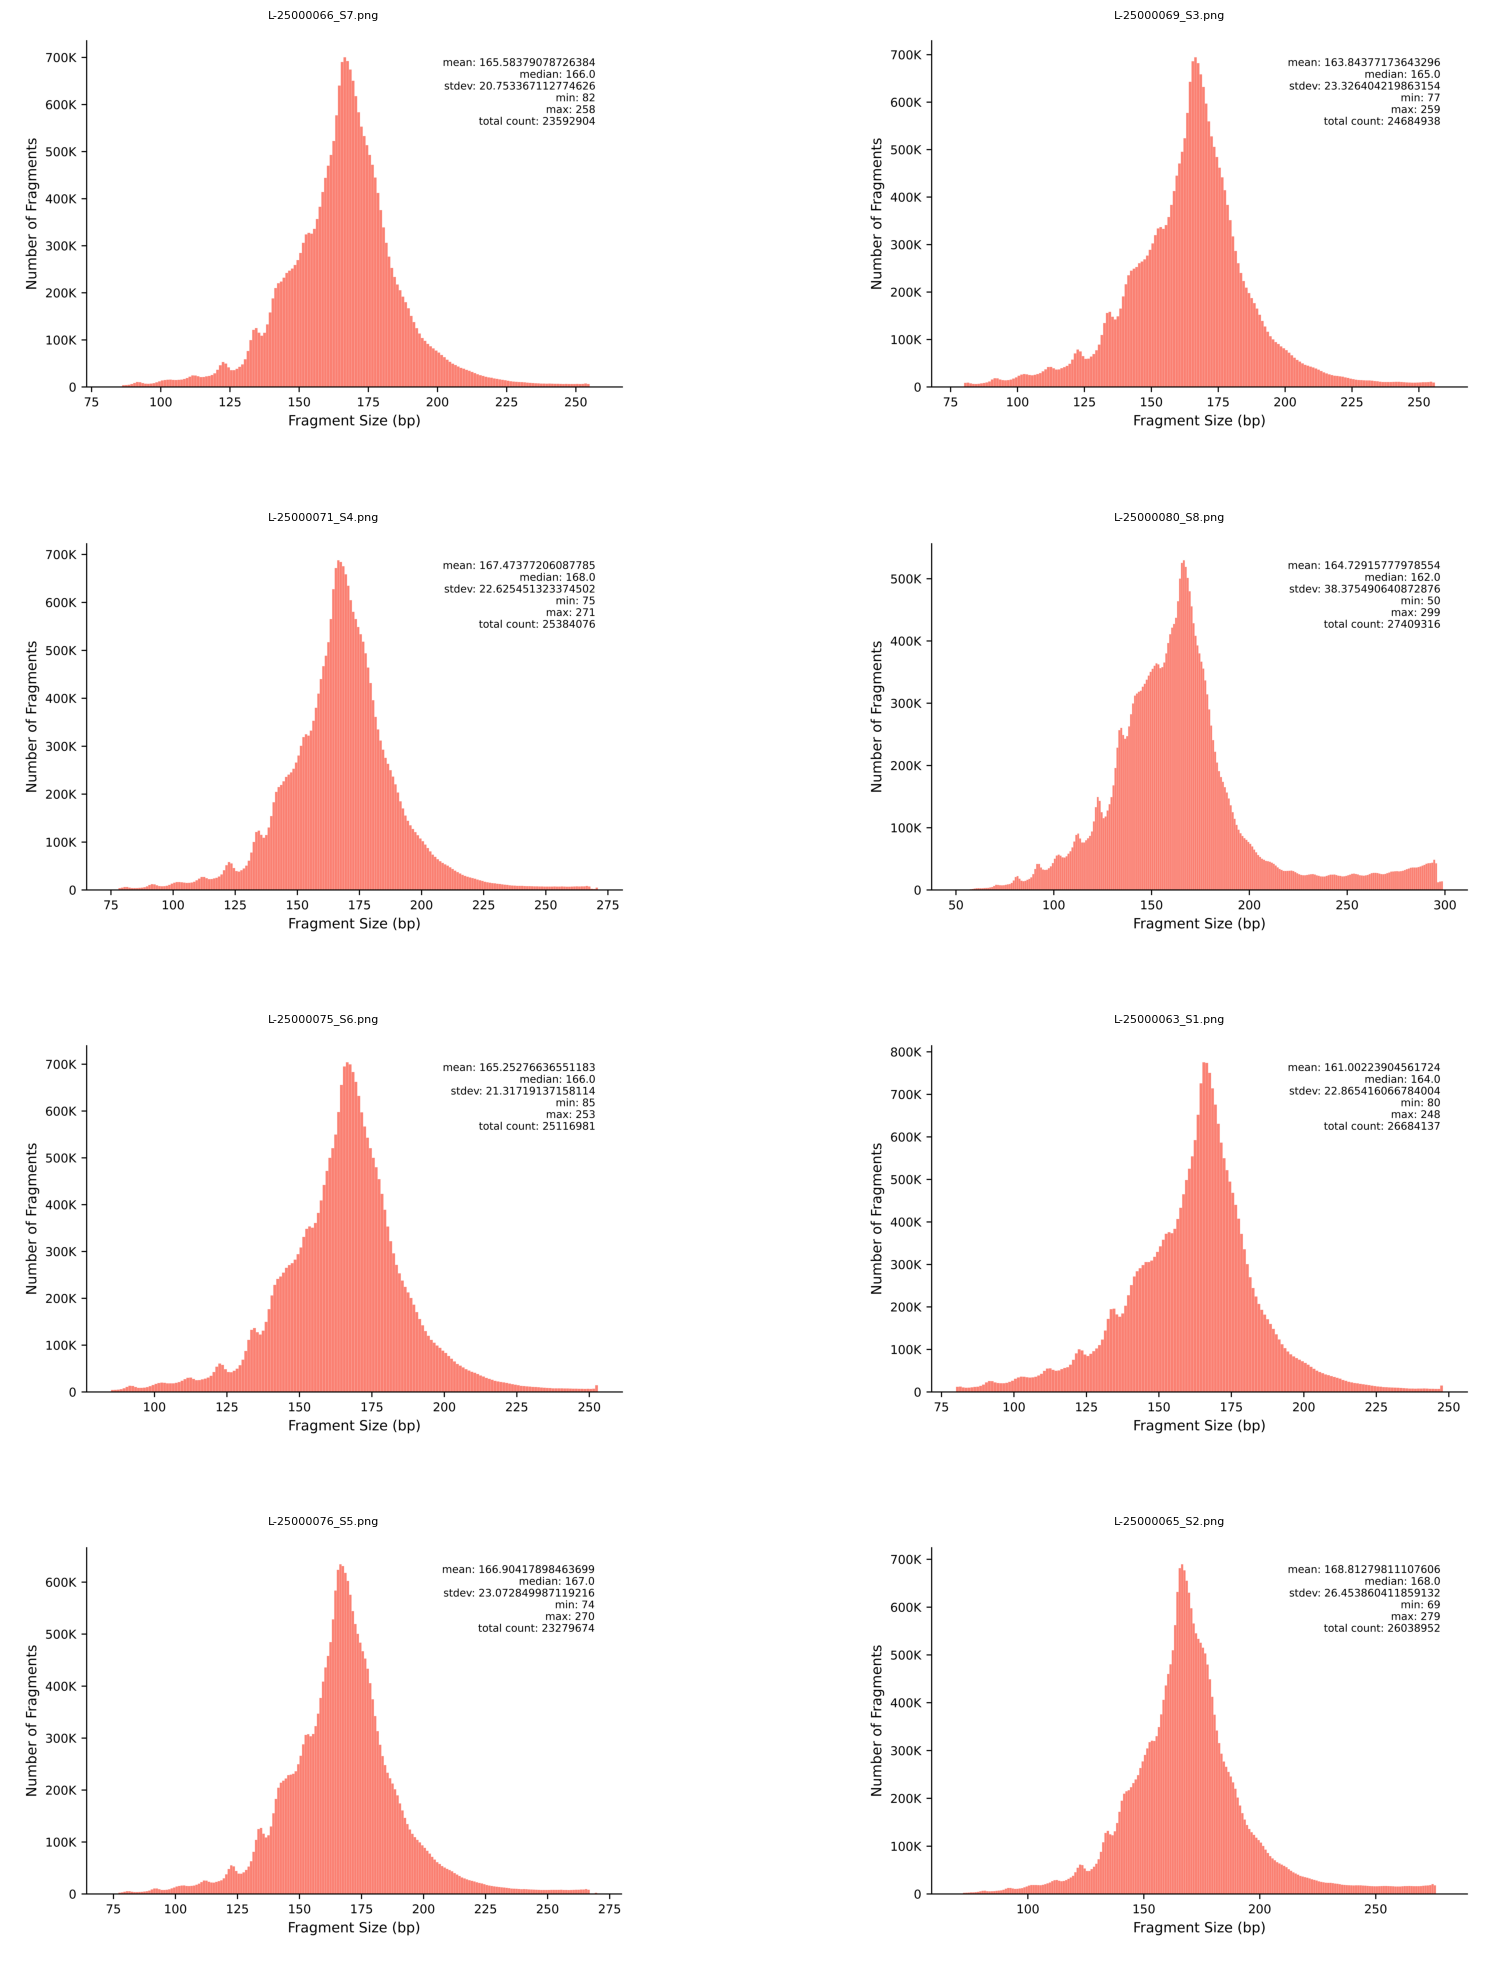

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pngfiles = glob.glob('results/plots/*.png')

# defino panel 
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

# Flatten axes array for easy iteration
axes = axes.flatten()

# iteramos en axis e imagenes
for ax, img_path in zip(axes, pngfiles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")  # no ticks or frames

    # saco el nombre
    fname = os.path.basename(img_path)

    # cogo lo de antes de .bam
    title = fname.split(".bam")[0]

    # Set the subplot title
    ax.set_title(title, fontsize=8)

## Motivos de corte

# TO-DO

## Procesado de datos:
- [x] Run POOL-527N
- [x] Running: POOL-473
- [x] Run las demas
- [ ] repetir snakemake usando tool Agilent para sacar fastq con UMI (3ra read) y marcar duplicados con picard UMI-aware thingy (ver mail Ivan)
- [x] script (o ver si hay funcion en Finaletoolkit) para QC bam files -> que todas las muestras limpias (ver regla frag anterior. Entre otras excluyando lecturas duplicadas) vayan a carpeta datos/ (y te quitas de iterar por POOLs que a estar alturas deberian darte igual porque no sabes que es que)

## Resultados:
- [ ] Histogram fragmentos overlap con dup vs sin dup-noUMI vs sin dup-UMI a ver como cambia.
- [ ] Anyadir a la comparacion anterior filtrando duplicados UMI-aware
- [ ] (50%) Automatizar generar .tsv y visualizaciones (primero decidir cuales son importantes)  

## Otros:
- [ ] redactar snakefile en metodos como https://github.com/epifluidlab/finaledb_workflow
- [ ] revisar comando HPC y especificar en metodos que corrido POOL per POOL por revisar errorer (tiempo de computacion aprox) - puede estar mas automatizado
- [ ] completar snakefile con regla bcl2fastq
- [ ] end motifs
- [ ] actualizar readme con como instalar y hacer el pipeline desde Illumina -> notebook? outputs?